In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load data into df
df = pd.read_csv('C:/Users/Lara/.vscode/EDA_project_customer_loans_in_finance/milestone_1/loan_payments.csv')

## Plotter

Information about the NULL values in the DataFrame must be presented in order to evaluate the method needed to transform the NULL values.

In [3]:
for column in df.columns:
    value_counts = df[column].value_counts()
    print(f"Column: {column}")
    print(value_counts)
    print("-------------------")

Column: id
id
38676116    1
977772      1
978511      1
978610      1
978315      1
           ..
8118025     1
8118008     1
8117993     1
8117883     1
72323       1
Name: count, Length: 54231, dtype: int64
-------------------
Column: member_id
member_id
41461848    1
1200591     1
1201556     1
1201469     1
1201371     1
           ..
9859996     1
9859978     1
9859963     1
9859862     1
70694       1
Name: count, Length: 54231, dtype: int64
-------------------
Column: loan_amount
loan_amount
10000    3951
12000    3062
15000    2844
20000    2625
5000     2013
         ... 
15375       1
28675       1
13525       1
27725       1
24750       1
Name: count, Length: 1083, dtype: int64
-------------------
Column: funded_amount
funded_amount
10000.0    3703
12000.0    2863
15000.0    2637
20000.0    2418
5000.0     1913
           ... 
19225.0       1
20900.0       1
24650.0       1
25700.0       1
24750.0       1
Name: count, Length: 1122, dtype: int64
-------------------
Column: fu

In [4]:
# View NULL values in the DataFrame before transformation

view_nulls_before = df.isnull().sum()
view_percentage_NULLs_before = df.isnull().sum()*100/len(df)
display(view_nulls_before)
display('-----------')
display(view_percentage_NULLs_before)

id                                 0
member_id                          0
loan_amount                        0
funded_amount                   3007
funded_amount_inv                  0
term                            4772
int_rate                        5169
instalment                         0
grade                              0
sub_grade                          0
employment_length               2118
home_ownership                     0
annual_inc                         0
verification_status                0
issue_date                         0
loan_status                        0
payment_plan                       0
purpose                            0
dti                                0
delinq_2yrs                        0
earliest_credit_line               0
inq_last_6mths                     0
mths_since_last_delinq         31002
mths_since_last_record         48050
open_accounts                      0
total_accounts                     0
out_prncp                          0
o

'-----------'

id                              0.000000
member_id                       0.000000
loan_amount                     0.000000
funded_amount                   5.544799
funded_amount_inv               0.000000
term                            8.799395
int_rate                        9.531449
instalment                      0.000000
grade                           0.000000
sub_grade                       0.000000
employment_length               3.905515
home_ownership                  0.000000
annual_inc                      0.000000
verification_status             0.000000
issue_date                      0.000000
loan_status                     0.000000
payment_plan                    0.000000
purpose                         0.000000
dti                             0.000000
delinq_2yrs                     0.000000
earliest_credit_line            0.000000
inq_last_6mths                  0.000000
mths_since_last_delinq         57.166565
mths_since_last_record         88.602460
open_accounts   

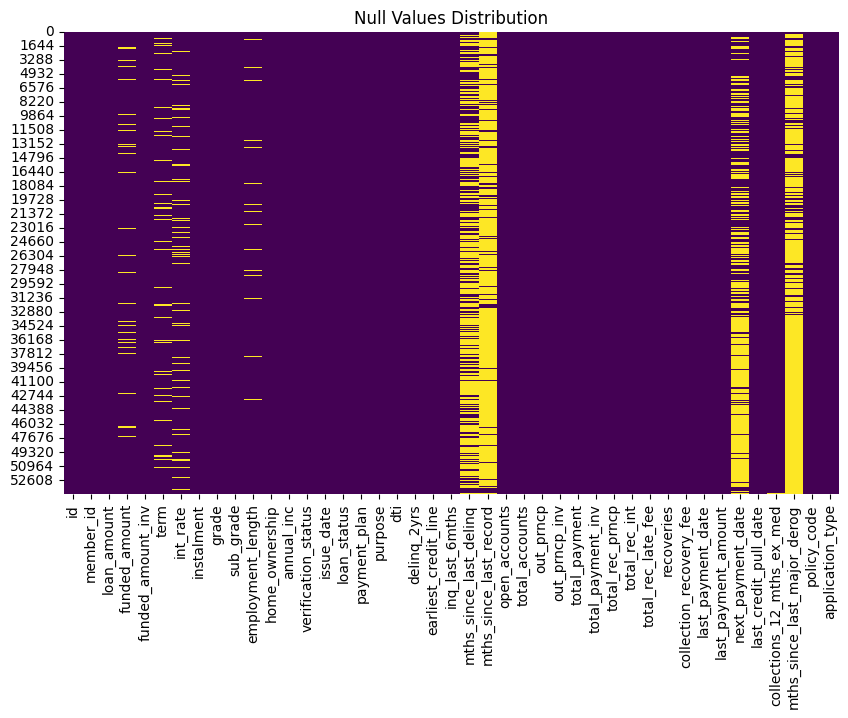

In [5]:
# Create a heatmap to visualize distribution of NULL values in the DataFrame

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Null Values Distribution')
plt.show()

# Analysis

x = The percentage of NULL values present in the column.

- There are 11 columns that contain NULL values.
- 4 columns contain a percentage of NULL values greater than 50 %. 
 x > 50 
This is significantly greater than the percentage of NULLs in the other columns. After consideration of the context and necessity of the data in these columns, they will be dropped from the DataFrame.
- 4 columns contain a percentage of NULL values between 1 and 10 %
1 < x > 10
This is a large enough percentage to skew the data however, dropping the column will result in the loss of a large amount of vital data. No pattern in the NULL values is observed in the heat map therefore, the distribution is random. The categorical data will have random values imputated and the continuous, numerical data will have the mean imputed. 
- 3 columns contain a percentage of NULL values between 0 and 1 %
0 < x > 1 
This is a small percentage of NULL values and will not affect the analysis of the data. The datetime data will have random values imputed and the continuous, numerical data will have the mean imputed.

## DataFrameTransform

To remove all NULL values from the DataFrame, different methods are implemented based on the characteristics of the NULL values and data as a whole.

The following columns will be dropped from the DataFrame:

- mths_since_last_delinq
- mths_since_last_record
- mths_since_last_major_derog
- next_payment_date

The following columns will have random values imputed to replace NULL values:

- term
- employment_length
- last_credit_pull_date
- last_payment_date
- collections_12_mths_ex_med 

The following columns will have the mean imputed to replace NULL values:

- int_rate
- funded_amount


In [6]:
# Drop columns with too many NULL values

threshold_fraction = 0.5

threshold = int((1-threshold_fraction)*len(df))

df = df.dropna(axis = 1, thresh= threshold)


In [7]:
# Impute random values into NULL values

columns_to_impute_randomly = ['term', 'employment_length', 'last_credit_pull_date', 'last_payment_date', 'collections_12_mths_ex_med']


def impute_randomly(column):
    null_indices = column.isnull()
    num_nulls = null_indices.sum()
    if num_nulls > 0:
        non_null_values = column.dropna()
        random_values = np.random.choice(non_null_values, size=num_nulls)
        column.loc[null_indices] = random_values
    return column



for column in columns_to_impute_randomly:
    df[column] = impute_randomly(df[column])




C:\Users\Lara\AppData\Local\Temp\ipykernel_15824\2294255259.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column.loc[null_indices] = random_values
C:\Users\Lara\AppData\Local\Temp\ipykernel_15824\2294255259.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column.loc[null_indices] = random_values
C:\Users\Lara\AppData\Local\Temp\ipykernel_15824\2294255259.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column.loc[null_in

In [8]:
# Impute the mean value into NULL values 

columns_to_impute_mean = [ 'int_rate', 'funded_amount']

for column in columns_to_impute_mean:
    df[column].fillna(df[column].mean(), inplace=True)

In [ ]:
# View NULL values in the DataFrame after transformations

view_nulls_after = df.isnull().sum()
view_percentage_NULLs_after = df.isnull().sum()*100/len(df)
display(view_nulls_after)
display('-----------')
display(view_percentage_NULLs_after)